<a href="https://colab.research.google.com/github/nikitoonsbug/IngConocimiento/blob/main/Copia_de_MachineLearning_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implementación del perceptron

In [ ]:
# Librerias
# Manejo de datos
import pandas as pd

#Manejo de matrices y funciones matemáticas
import numpy as np

#Graficación
import matplotlib.pyplot as plt


#Algoritmos para implementar el perceptron y la red neuronal
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
#Ingresar datos y generar data frame.
#Las clasificaciones ya las conocemos a priori, por lo cual se tienen los datos de necesidades especiales(2) y alumnos regulares (1) en desempeño.
#Esto nos dará un criterio matemático p7ara determinar, considerndo los datos base (Edad, Grado y Calificacion), es potencial candidato para atención especial.
df=pd.read_csv("https://docs.google.com/spreadsheets/d/1y5PL3gKL3gRqYqtdKx-UxynBlm3ws5k11zlUdEBqoX0/export?format=csv")
df

,Edad,Grado,Calificación,Desempeño
0,16,2,6,2
1,16,2,10,2
2,13,2,8,1
3,15,3,5,2
4,13,1,10,1
...,...,...,...,...
95,14,3,7,2
96,13,2,7,2
97,14,3,8,1
98,13,1,5,2


In [ ]:
#Agupación de datos
x=df.iloc[:,0:3].values
y=df.iloc[:,3].values
print(x)
print(y)

[[16  2  6]
 [16  2 10]
 [13  2  8]
 [15  3  5]
 [13  1 10]
 [14  2  7]
 [15  2  6]
 [12  2 10]
 [13  1  9]
 [13  2  9]
 [16  3  7]
 [14  3  5]
 [14  2  7]
 [14  3  7]
 [14  2  7]
 [13  1  5]
 [15  3 10]
 [15  3  9]
 [16  2  8]
 [15  2 10]
 [12  1  5]
 [15  2  8]
 [16  3 10]
 [15  3  6]
 [16  2  9]
 [12  2  8]
 [13  1  6]
 [12  1  5]
 [13  1  9]
 [12  1  8]
 [14  3  9]
 [12  1  9]
 [14  3  7]
 [14  3  5]
 [14  3  8]
 [16  3  5]
 [15  3  9]
 [13  1 10]
 [13  2  5]
 [15  3  7]
 [14  2  8]
 [13  2  9]
 [12  2  9]
 [12  2  6]
 [15  2  8]
 [14  2  8]
 [16  3  5]
 [16  2  5]
 [12  2  7]
 [15  2 10]
 [13  1  6]
 [13  2  9]
 [16  2  6]
 [13  2 10]
 [16  2  8]
 [14  3  9]
 [14  3  7]
 [16  2 10]
 [13  2  9]
 [16  3  8]
 [13  2  7]
 [16  3  7]
 [16  2  5]
 [13  1  5]
 [15  3  7]
 [15  3  6]
 [13  1  5]
 [12  1  9]
 [15  2  8]
 [13  1  6]
 [16  3  9]
 [14  3 10]
 [13  1  8]
 [13  2  6]
 [14  2  6]
 [15  2 10]
 [13  1  9]
 [14  2  6]
 [14  2  8]
 [15  2  9]
 [12  1 10]
 [12  1  9]
 [16  2  7]
 [14

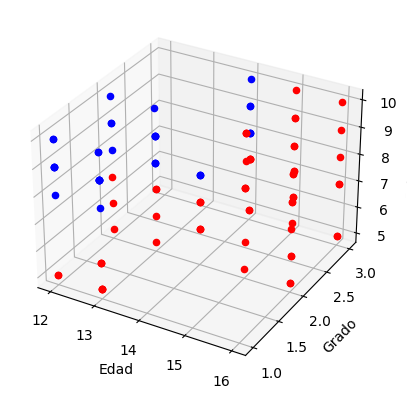

In [ ]:
#GRAFICAR LOS DATOS
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(0,len(y)):
  if y[i]==1:
    c="blue"
  if y[i]==2:
    c="red"
  ax.scatter(x[i,0],x[i,1],x[i,2],color=c)

ax.set_xlabel('Edad')
ax.set_ylabel('Grado')
ax.set_zlabel('Calificación')
plt.show()

In [ ]:
#Implementación del Perceptron-- Es un clasificador lineal y= mx +e
pcp=Perceptron()
pcp.fit(x,y)
yp=pcp.predict(x)
df["modeloperc"]=pd.Series(yp)
df

,Edad,Grado,Calificación,Desempeño,modeloperc
0,16,2,6,2,2
1,16,2,10,2,1
2,13,2,8,1,1
3,15,3,5,2,2
4,13,1,10,1,1
...,...,...,...,...,...
95,14,3,7,2,2
96,13,2,7,2,2
97,14,3,8,1,2
98,13,1,5,2,2


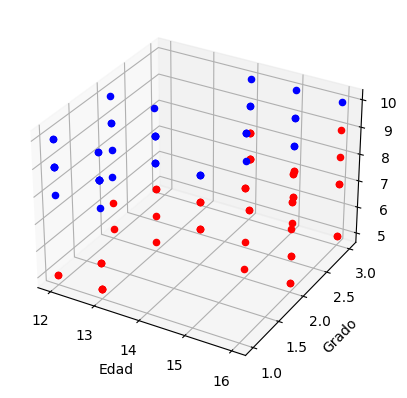

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(0,len(yp)):
  if yp[i]==1:
    c="blue"
  if yp[i]==2:
    c="red"
  ax.scatter(x[i,0],x[i,1],x[i,2],color=c)

ax.set_xlabel('Edad')
ax.set_ylabel('Grado')
ax.set_zlabel('modeloperc')
plt.show()

##Implementación de red Neuronal

In [ ]:
#Implementación de la red neuronal

std=StandardScaler()
xtrain, xtest, ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
xtrain=std.fit_transform(xtrain) #Normalización de datos
xtest=std.fit_transform(xtest)
xu=std.fit_transform(x)
NNA=MLPClassifier(random_state=1,max_iter=500).fit(xtrain,ytrain)
ypnn=NNA.predict(xu)
df["modelonn"]=pd.Series(ypnn)
df

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Edad,Grado,Calificación,Desempeño,modeloperc,modelonn
0,16,2,6,2,2,2
1,16,2,10,2,1,2
2,13,2,8,1,1,1
3,15,3,5,2,2,2
4,13,1,10,1,1,1
...,...,...,...,...,...,...
95,14,3,7,2,2,2
96,13,2,7,2,2,2
97,14,3,8,1,2,1
98,13,1,5,2,2,2


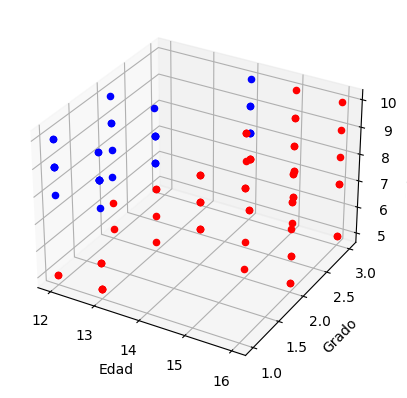

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(0,len(yp)):
  if ypnn[i]==1:
    c="blue"
  if ypnn[i]==2:
    c="red"
  ax.scatter(x[i,0],x[i,1],x[i,2],color=c)

ax.set_xlabel('Edad')
ax.set_ylabel('Grado')
ax.set_zlabel('Calificación')
plt.show()
